In [1]:

import sys 
sys.path.append(r'C:\Users\diogogoncalves\Desktop\EQS_LOCAL\Bitbucket_eqs')
import analytics_stat.distributions as di

import warnings
warnings.filterwarnings('ignore')

import datetime
import scipy.stats as s
#import scipy.optimize as opt
#import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline
# %matplotlib notebook

import os
import json
import pandas as pd
import qgrid
from IPython.display import HTML, Image, display, clear_output
# display(HTML("<style>.container { width:95% !important; }</style>"))

# py.sign_in('diogo.antunes.goncalves', 'kt7T5JadNn2AhWk3DdPR')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

display(HTML('''<script>
code_show=false;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To hide/show code, click <a href="javascript:code_toggle()">here</a>.''')) 



In [2]:
import traitlets
from tkinter import Tk, filedialog


class Plotting:
    
    def __init__(self):
        pass
    
    def plot_line(self, json, x, y, name):
        x = json.x
        y = json.y
        name = json.name
        trace_line = go.Scatter(x = x, y = y, mode = 'lines', opacity = 0.8, name = name, xaxis = 'x', yaxis = 'y')
        
    def plot_scatter(self,  x, y, name):
        x = json.x
        y = json.y
        name = json.name
        trace_scatter = go.Scatter(x = x, y = y, mode = 'markers', opacity = 0.8, name = fn, xaxis = 'x', yaxis = 'y')
        
    def plot_histogram(self,  x, name, normed):
        x= json.x
        normed = json.type  # 'probability'
        trace_histogram = go.Histogram(x=x, histnorm=normed)
                           
    def create_layout(self, title, xlabel, ylabel):
        title = json.title
        xlabel = json.xlabel
        ylabel = json.ylabel
        layout = Layout(title=title, yaxis=dict(title=ylabel)) 
        
    def draw(self,trace,layout):
        fig = go.Figure(data = [trace_histogram],layout=layout)
        py.iplot(fig)

        

class StatPlot(Plotting):
    
    def __init__(self):
        
        pass
    
    def pdf(self, json):
        
        pdf_mle = dist_funs[dist_index[0]].pdf(params_dist_mle,  x_plot)



class DisplayCalc:
    
    def __init__(self):
        
        # Select file button
        self._bsf = widgets.Button(layout=widgets.Layout(width='500px',height='50px'))
        self._bsf.add_traits(files=traitlets.traitlets.List())
        self._bsf.description = "Select Model File"
        self._bsf.icon = "square-o"
        self._bsf.on_click(self.select_json)
        
        
        # Load Json button
        self._blj = widgets.Button(layout=widgets.Layout(width='500px',height='50px'))
        self._blj.description = "Load Model"
        self._blj.icon = 'download'
        self._blj.on_click(self.load_json_model)
        self._blj.disabled = True
        
        # Plot button
        self._bplot = widgets.Button(layout=widgets.Layout(width='500px',height='50px'))
        self._bplot.description = 'Plot'
        self._bplot.icon = "area-chart"
        self._bplot.on_click(self.plot_pdf)
        self._bplot.disabled = False
        
        # Save model button
        self._bsm = widgets.Button(layout=widgets.Layout(width='500px',height='50px'))
        self._bsm.description = 'Save Analysis'
        self._bsm.icon = "floppy-o"
        self._bsm.on_click(self.save_model_json)
        self._bsm.disable = True
        
        # Select Plot type
        self._dd_plots = widgets.Dropdown(
            options=['PDF','CDF','BxLife','ProbPlot'],
            value='PDF',
            description='Select Analysis:',
            disabled=False,
            layout=widgets.Layout(width='300px', height='50px'))
        
        # define layout
#         box_layout = widgets.Layout(display='center',
#                             flex_flow='row',
#                             align_items='center',
#                             border='None',
#                             justify_content='space-between',
#                             width='800px')
        box_layout = widgets.Layout(display='center',
                                    flex_flow='row',
                                    # align_items='center',
                                    border='None',
                                    justify_content='center',
                                    # width='500px'
                                    )
        
        self._box_a = widgets.Box(children=[self._bsf,
                                          self._blj,  
#                                           self._bsm
                                           ], layout=box_layout)
        
        self._box_b = widgets.Box(children=[self._dd_plots,self._bplot,
                                          ], layout=box_layout)
        
        display(widgets.VBox([self._box_a, self._box_b]))
        
    def select_json(self,b): 
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.',
                  '-topmost', True)
        
        new_file = filedialog.askopenfilename(multiple=True,filetypes = [("JSON",'*.json')])
        if new_file != "":
            self._bsf.files = new_file

        print('Selected file: {}'.format(self._bsf.files ))

        self._bsf.description = "Model Selected"
        self._bsf.icon = "check-square-o"
        self._bsf.button_style = "success"
        
        self._blj.disabled = False

        
        
    def load_json_model(self, b):
        
        file_path = self._bsf.files
        if (type(file_path) == list) and (len(file_path)>0):
            with open(file_path[0], 'r') as f:
                self._json_file = json.load(f)
                
            self._client = self._json_file['client_name']
            self._clientid = self._json_file['client_id']
            self._symptom = self._json_file['symptom']
                
            self._blj.button_style = "success"
            print('JSON loaded:')
            print(self._json_file)
        else:
            print('Select file.')
            
            
    def save_model_json(self, b):
        json_model = dict()
        json_model['version'] = 0.1 
        json_model['saved_time'] = str(datetime.datetime.now())
        
        if self._symptom is None:
            json_model['symptom'] = None
        elif isinstance(self._symptom, int):
            json_model['symptom'] = int(self._symptom)
        elif isinstance(self._symptom, list):
            json_model['symptom'] = self._symptom
        else:
            raise TypeError('Undefined type for Symptom')
            
        json_model['client_id'] = int(self._clientid)
        json_model['client_name'] = self._client
        
        json_model['input_json'] = os.path.splitext(os.path.basename(d._bsf.files[0]))[0]
        json_model['competing_models'] = list(self._sdist.value)
        
        json_model['best_model'] = dict()
        json_model['best_model']['law'] = self._combs[0].iloc[0].name
        json_model['best_model']['MLE'] = dict()
        json_model['best_model']['MLE']['params'] = self._res_mle[json_model['best_model']['law']]['params']
        json_model['best_model']['MLE']['goodness_of_fit'] = self._res_mle[json_model['best_model']['law']]['goodness_of_fit']
        
        json_model['best_model']['LSQ'] = dict()
        json_model['best_model']['LSQ']['params'] = self._res_ls[json_model['best_model']['law']]['params']
        json_model['best_model']['LSQ']['goodness_of_fit'] = self._res_ls[json_model['best_model']['law']]['goodness_of_fit']
                                
        with open("../models/stat/model_{}_{}.json".format(json_model['input_json'],
                                                           json_model['best_model']['law']), 'w') as f:
            json.dump(json_model, f)
        
        self._bsm.button_style = 'success'
        
        
    def plot_pdf(self,b):
        print('pdf')

In [3]:
d = DisplayCalc()

Selected file: ['C:/Users/diogogoncalves/Desktop/EQS_LOCAL/Projects/reliability_analytics/RDA_app/models/stat/model_ttf_symptomNone_client5_weibull3p.json']
pdf
pdf
pdf
pdf


In [5]:
d._json_file['best_model']['law']

'weibull3p'

In [6]:
d._json_file['best_model']['LSQ']['params']

[0.8335213893186694, 17.4212315853981, 0.5008473439681994]

In [21]:
d._json_file

{'best_model': {'LSQ': {'goodness_of_fit': {'ks': 0.9996831349543684,
    'lk': -356.7148669052363,
    'r_sq': 0.9956015039297932},
   'params': [0.8335213893186694, 17.4212315853981, 0.5008473439681994]},
  'MLE': {'goodness_of_fit': {'ks': 0.9996831349543684,
    'lk': -350.2721532085231,
    'r_sq': 0.9953003245971949},
   'params': [0.8396019185883878, 17.300285354263625, 0.9933372468035472]},
  'law': 'weibull3p'},
 'client_id': 5,
 'client_name': 'MANOLO',
 'competing_models': ['weibull3p',
  'weibull2p',
  'normal',
  'lognormal',
  'exponential1p',
  'exponential2p',
  'logistic',
  'loglogistic'],
 'input_json': 'ttf_symptomNone_client5',
 'saved_time': '2017-10-13 10:38:10.856039',
 'symptom': None,
 'version': 0.1}

In [7]:
convergence_criterium = 1e-4
int_MTBF = np.cumsum(1-di.weibull().cdf(d._json_file['best_model']['MLE']['params'],np.arange(0,130)))

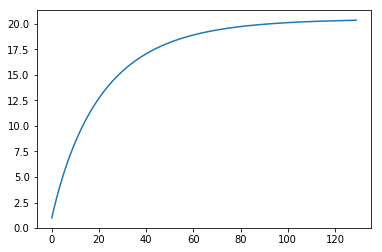

In [8]:
plt.plot(int_MTBF)

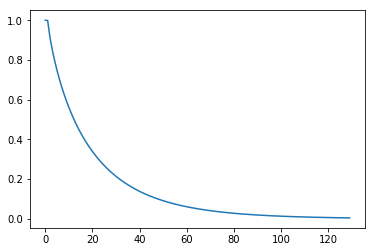

In [9]:
plt.plot(1-di.weibull().cdf(d._json_file['best_model']['MLE']['params'],np.arange(0,130)))

In [10]:
convergence_criterium

0.0001

In [11]:
int_MTBF[np.argmax(np.diff(np.diff(int_MTBF)))]

20.327927349699646

In [12]:
int_MTBF[np.max(np.where(np.diff(np.diff(np.diff(int_MTBF)))>convergence_criterium))]  # converging criteria

18.770363237513457

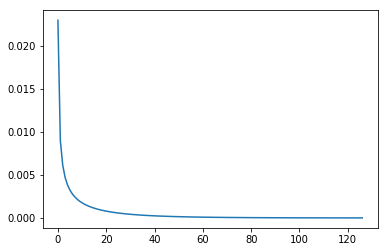

In [13]:
plt.plot(np.diff(np.diff(np.diff(int_MTBF))))

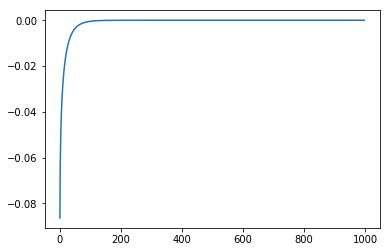

In [14]:
plt.plot(np.diff(np.diff(np.cumsum(1-di.weibull().cdf(d._json_file['best_model']['MLE']['params'],np.arange(0,1000,1))))))

### Data statistical summary:

In [47]:
# perc = np.linspace(0,1-1e-3,10)*100

perc = np.array([0.01,.1,
                 1,2,3,4,5,6,7,8,9,10,
                 20,30,40,50,60,70,80,85,90,95,
#                  99,
#                 99.9,
                 99.99
                ])

In [48]:
percentile = di.weibull().ppf(d._json_file['best_model']['MLE']['params'],perc/100)

In [49]:
table_of_percentiles = pd.DataFrame({'BX%':perc,'Percentile (t)':percentile})
table_of_percentiles

,BX%,Percentile (t)
0,0.01,0.993635
1,0.10,0.997963
2,1.00,1.065543
3,2.00,1.159192
4,3.00,1.263796
5,4.00,1.376666
6,5.00,1.496470
7,6.00,1.622412
8,7.00,1.753968
9,8.00,1.890775


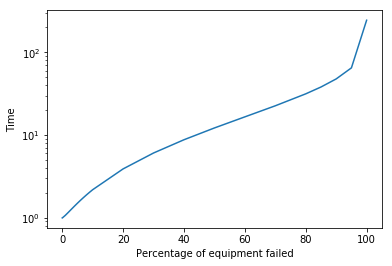

In [50]:
fig, ax = plt.subplots()
ax.semilogy(perc, percentile)
ax.set_xlabel('Percentage of equipment failed')
ax.set_ylabel('Time')

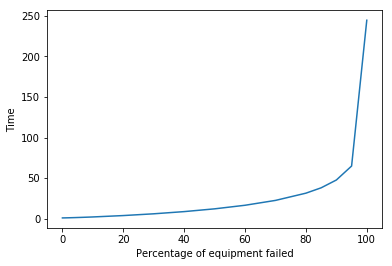

In [51]:
plt.plot(perc,percentile)
plt.xlabel('Percentage of equipment failed')
plt.ylabel('Time')